<b> DATA SCIENCE AND BUSINESS ANALYTICS( GRIP JUNE-2021)</b>

<b> AUTHOR : ANIT ROSLIN PAUL </b>

<b> TASK 6 :  PREDICTION USING DECISION TREE ALGORITHM</b>

<b><h3>Importing Required Libraries</h3></b>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.metrics
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

<b><h3> Loading the Dataset</h3> </b>

In [11]:
df = pd.read_csv('Iris.csv')

In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<b><h3>Formatting the Dataset</h3></b>

In [14]:
species = LabelEncoder()

In [15]:
df['species']= species.fit_transform(df['Species'])

In [16]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [17]:
df['species'].unique()

array([0, 1, 2])

In [18]:
df = df.drop(['Species'], axis = 1)

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [20]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species          0
dtype: int64

In [21]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [22]:
X = df.drop(['species','Id'], axis = 1)

In [23]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = df[['species']]

In [25]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<b><h3>Splitting the dataset into training and testing sets</h3></b>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [27]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
63,6.1,2.9,4.7,1.4
116,6.5,3.0,5.5,1.8
99,5.7,2.8,4.1,1.3
28,5.2,3.4,1.4,0.2
...,...,...,...,...
40,5.0,3.5,1.3,0.3
13,4.3,3.0,1.1,0.1
70,5.9,3.2,4.8,1.8
96,5.7,2.9,4.2,1.3


In [28]:
y_train

,species
106,2
63,1
116,2
99,1
28,0
...,...
40,0
13,0
70,1
96,1


<h3><b> Creating the Decsion Tree Classifier </b></h3>

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
prediction = model.predict(X_test)

In [32]:
model.predict([[6.3,3.2,5.4,2.3]])

array([2])

In [33]:
model.predict([[4.3,2.0,3.7,1.1]])

array([1])

In [34]:
model.predict([[5.1,3.8,1.9,0.4]])

array([0])

In [36]:
model.score(X_test, y_test)

0.9333333333333333

In [27]:
matrix = confusion_matrix(y_test,prediction)

Text(69.0, 0.5, 'Truth')

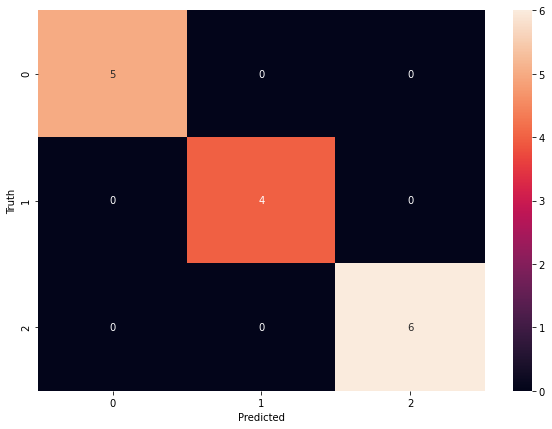

In [28]:
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<b><h3>Visualizing the Decision Tree</h3></b>

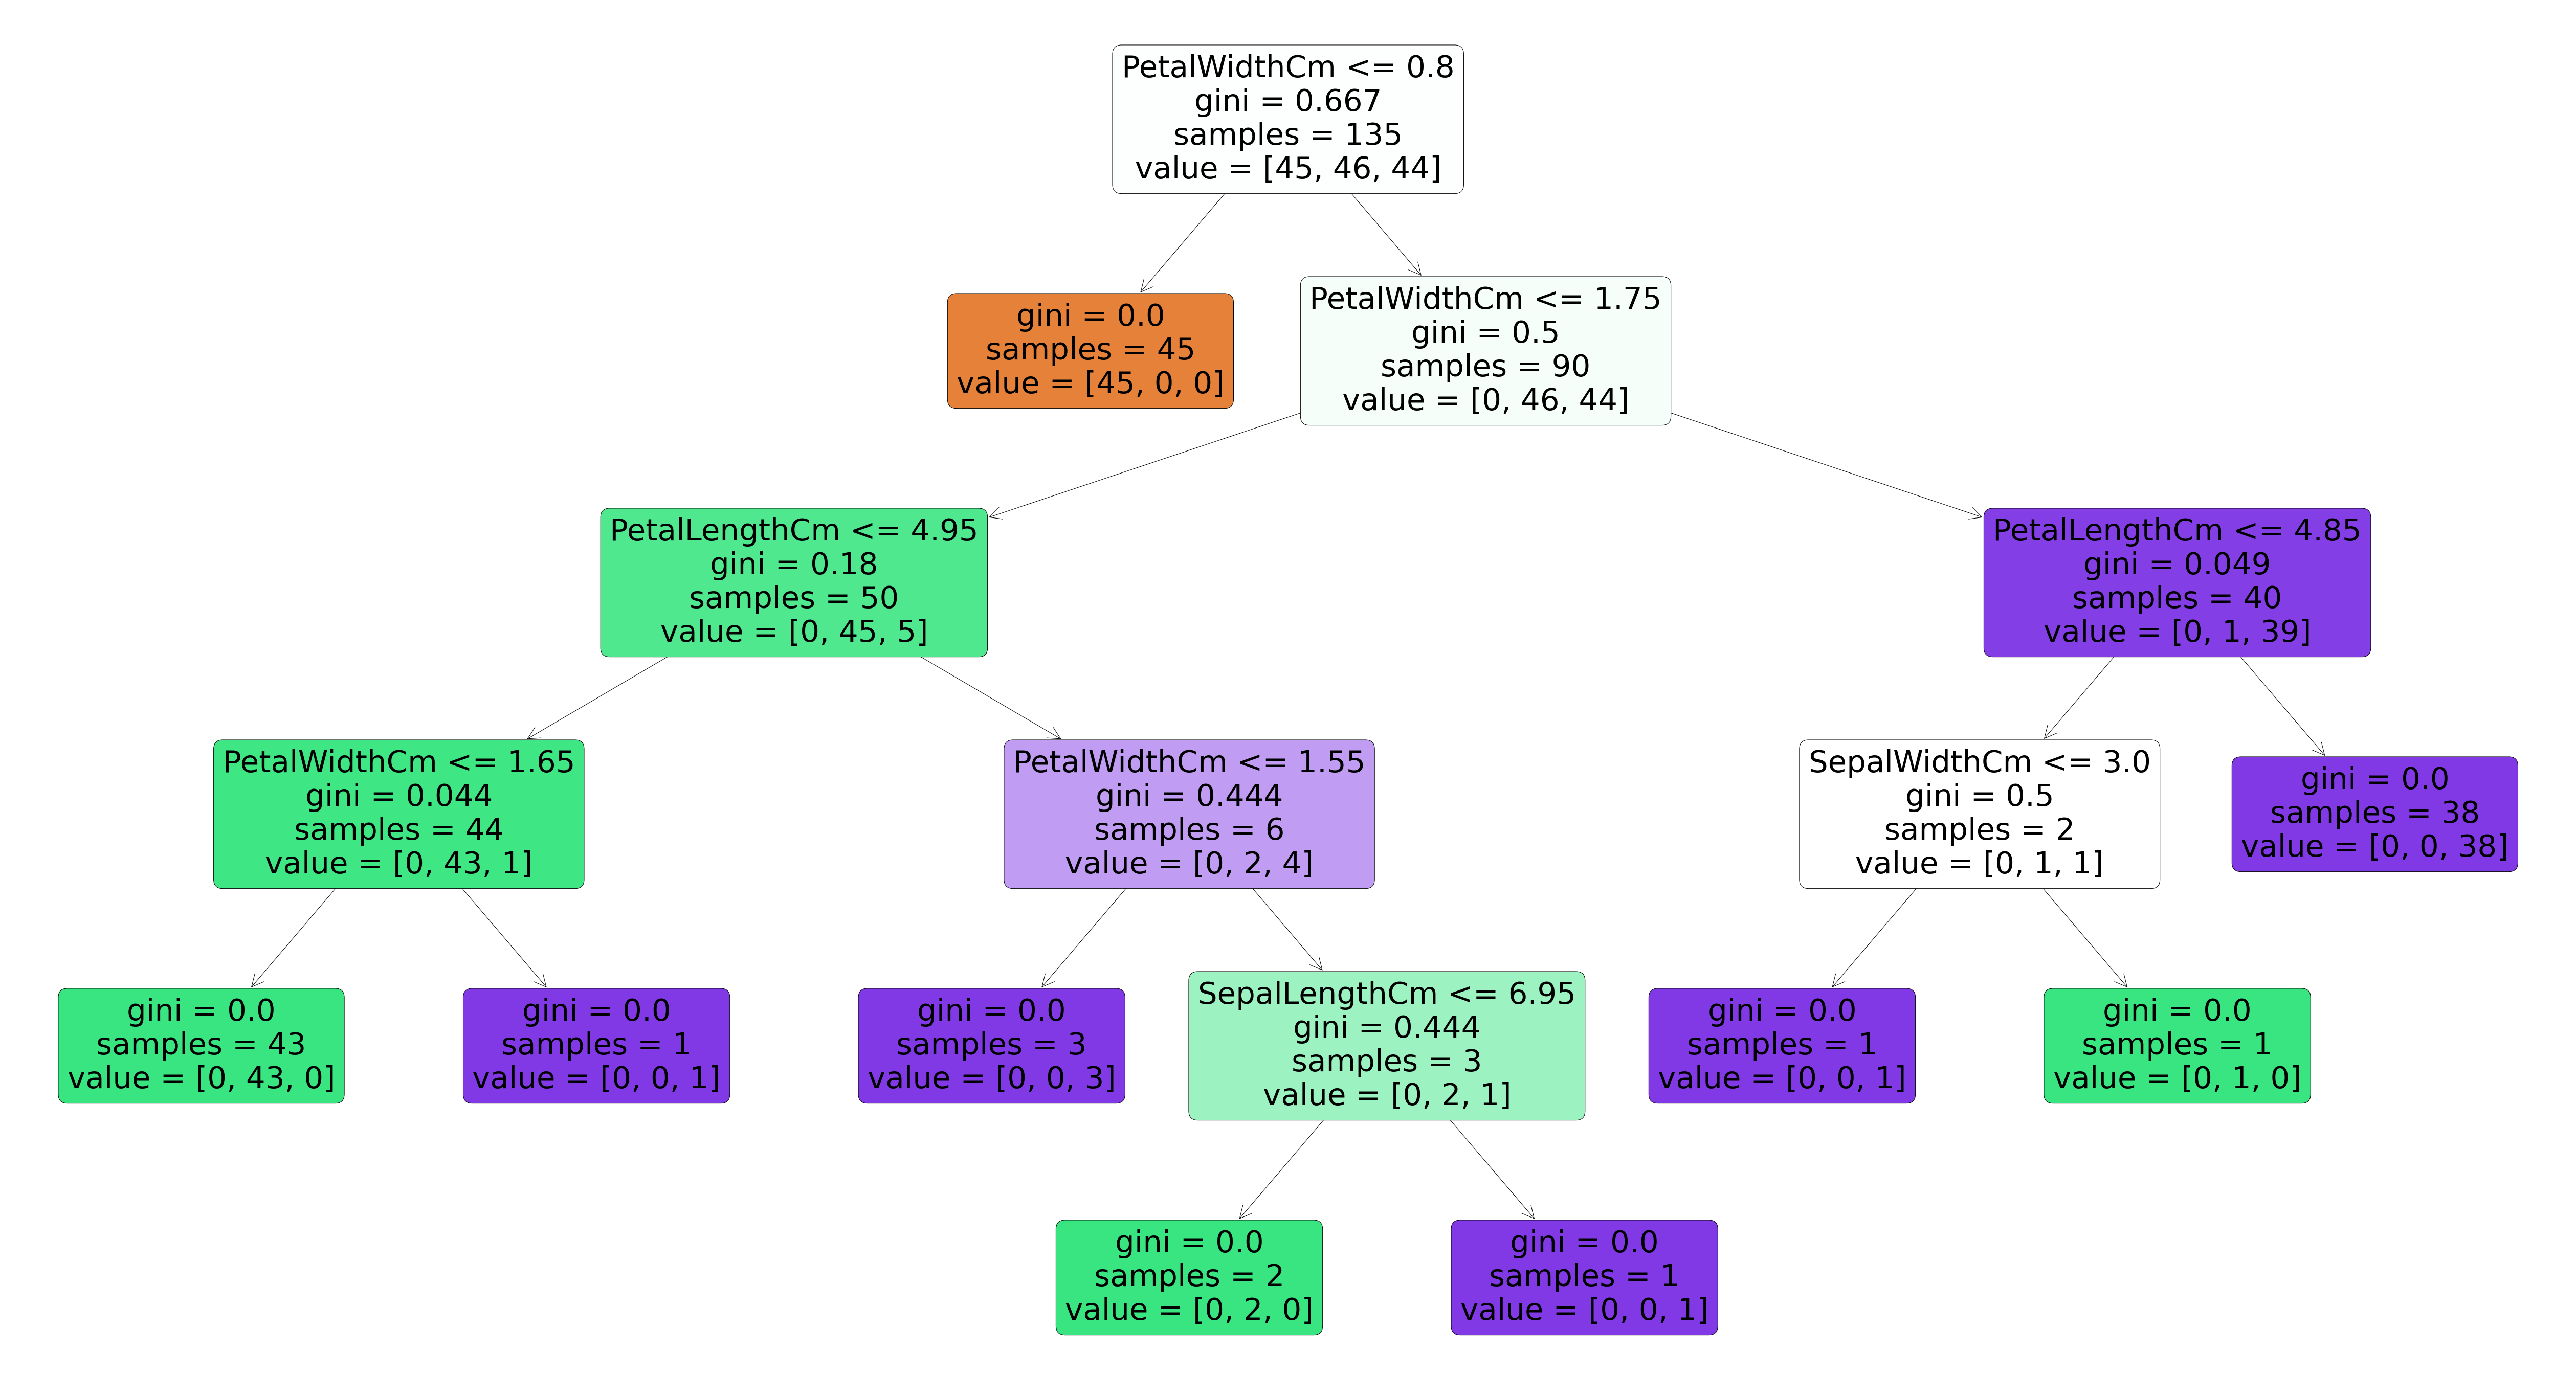

In [71]:
plt.figure(figsize=(90,50))
plot_tree(model, filled=True, 
          feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
          rounded=True);